# Import required Libraries

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Fetch the dataset (read data)

In [258]:
A= pd.read_csv("cars93.csv")

# Initial Analysis of data (shape, type of data, missing values, etc.)

In [259]:
A.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


Looking at the dataset with head command, first five rows. The data set has 28 column.

In [260]:
A.rename(columns={'Min.Price':'MinPrice','Max.Price':'MaxPrice','MPG.city':'MPGcity','MPG.highway':'MPGhighway', 'Rev.per.mile':'Revpermile', 'Fuel.tank.capacity':'Fueltankcapacity','Turn.circle':'Turncircle','Rear.seat.room':'Rearseatroom','Luggage.room':'Luggageroom','Man.trans.avail':'Mantransavail'}, inplace= True)

Renaming the column name. The columns having '.' in between has been renamed. 

In [261]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        93 non-null     int64  
 1   Manufacturer      93 non-null     object 
 2   Model             93 non-null     object 
 3   Type              93 non-null     object 
 4   MinPrice          93 non-null     float64
 5   Price             93 non-null     float64
 6   MaxPrice          93 non-null     float64
 7   MPGcity           93 non-null     int64  
 8   MPGhighway        93 non-null     int64  
 9   AirBags           89 non-null     object 
 10  DriveTrain        93 non-null     object 
 11  Cylinders         93 non-null     object 
 12  EngineSize        93 non-null     float64
 13  Horsepower        93 non-null     int64  
 14  RPM               93 non-null     int64  
 15  Revpermile        93 non-null     int64  
 16  Mantransavail     93 non-null     object 
 17 

Looking at the above details, the data types of each coloumn is clear (int, float, object).

In [262]:
A.shape

(93, 28)

In [263]:
A.describe()

,Unnamed: 0,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,EngineSize,Horsepower,RPM,Revpermile,Fueltankcapacity,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,47.000000,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,26.990739,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,1.000000,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,24.000000,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,47.000000,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,70.000000,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,93.000000,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


By looking at the above table, the data seems to be  in good shape and no outliers present (oultiers will be explored at later stage by box plot)

In [264]:
A.columns

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'MinPrice', 'Price',
       'MaxPrice', 'MPGcity', 'MPGhighway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Revpermile',
       'Mantransavail', 'Fueltankcapacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turncircle', 'Rearseatroom', 'Luggageroom',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [265]:
A.drop(labels='Unnamed: 0', axis=1, inplace=True)

We will drop this Unnaed: 0 column as its of no significance.

In [266]:
A.isnull().sum()

Manufacturer         0
Model                0
Type                 0
MinPrice             0
Price                0
MaxPrice             0
MPGcity              0
MPGhighway           0
AirBags              4
DriveTrain           0
Cylinders            0
EngineSize           0
Horsepower           0
RPM                  0
Revpermile           0
Mantransavail        0
Fueltankcapacity     0
Passengers           0
Length               0
Wheelbase            0
Width                0
Turncircle           0
Rearseatroom         2
Luggageroom         11
Weight               0
Origin               0
Make                 0
dtype: int64

Missing values found in Columns- 
1. AirBags- 4, 

2. Rearseatroom- 2, 

3. Luggageroom- 11

To replace missiing values, the categorical columns will be replaced by the mode value and in continuous columns missing values will be replaced by the mean. 

# Pre-processing - Treatment of Missing Values and separating continous and catregorical columns

In [267]:
cat = []
con = []
for i in A:
    if(A[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

    for i in con:
        replacer = A[i].mean()
        A[i] = A[i].fillna(replacer)

    for i in cat:
        replacer = pd.DataFrame(A[i].value_counts()).index[0]
        A[i] = A[i].fillna(replacer)

In [268]:
A.isna().sum()

Manufacturer        0
Model               0
Type                0
MinPrice            0
Price               0
MaxPrice            0
MPGcity             0
MPGhighway          0
AirBags             0
DriveTrain          0
Cylinders           0
EngineSize          0
Horsepower          0
RPM                 0
Revpermile          0
Mantransavail       0
Fueltankcapacity    0
Passengers          0
Length              0
Wheelbase           0
Width               0
Turncircle          0
Rearseatroom        0
Luggageroom         0
Weight              0
Origin              0
Make                0
dtype: int64

In [269]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Mantransavail',
 'Origin',
 'Make']

In [270]:
con

['MinPrice',
 'Price',
 'MaxPrice',
 'MPGcity',
 'MPGhighway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Revpermile',
 'Fueltankcapacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turncircle',
 'Rearseatroom',
 'Luggageroom',
 'Weight']

# Exploratory data analysis 
## Univariate Analysis- Categorical Columns

<AxesSubplot:title={'center':'Distribution of Type of cars:'}, xlabel='Type', ylabel='count'>

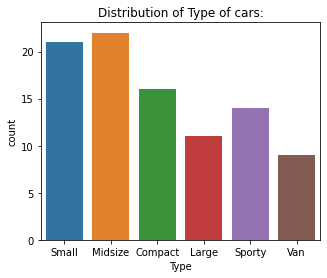

In [323]:
plt.figure(figsize=(5, 4))
plt.title("Distribution of Type of cars:")
sb.countplot(A.Type)

Midsize and small vehicles are more in number (preferred) , Van and large has less count, Whereas compact and spory segment cars are average in number.

<AxesSubplot:title={'center':'Distribution of manufacturer of cars:'}, xlabel='Manufacturer', ylabel='count'>

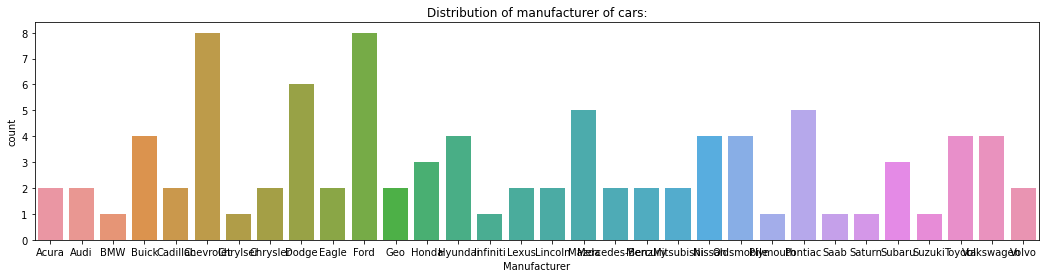

In [324]:
plt.figure(figsize=(18, 4))
plt.title("Distribution of manufacturer of cars:")
sb.countplot(A.Manufacturer)

There are many manufacturer and looks as if it is not a significant feature.

<AxesSubplot:title={'center':'Different models of cars:'}, xlabel='Model', ylabel='count'>

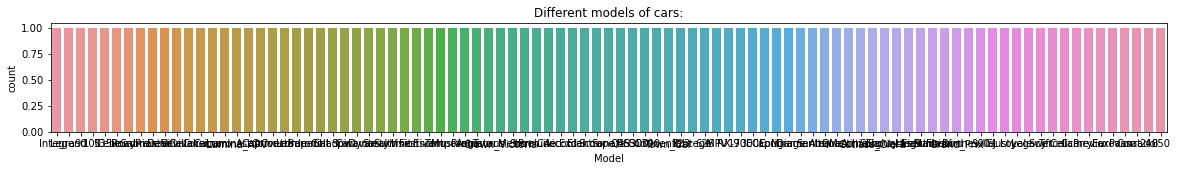

In [325]:
plt.figure(figsize=(20,2))
plt.title("Different models of cars:")
sb.countplot(A.Model)

There is not much to infer from above plot, there are many model type and will not play an important role as a feture.

<AxesSubplot:title={'center':'Make of cars:'}, xlabel='Make', ylabel='count'>

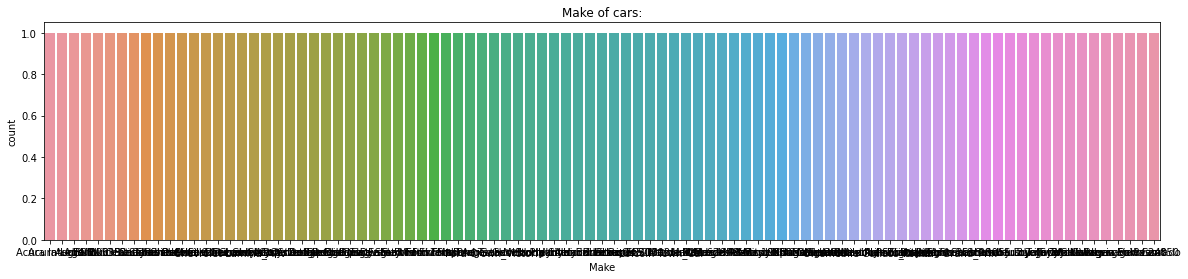

In [326]:
plt.figure(figsize=(20,4))
plt.title("Make of cars:")
sb.countplot(A.Make)

In [306]:
A.Model.value_counts()

Achieva    1
Maxima     1
240        1
Eurovan    1
Camaro     1
          ..
Civic      1
Tempo      1
LeMans     1
300E       1
100        1
Name: Model, Length: 93, dtype: int64

<AxesSubplot:title={'center':'Type of Drive train in car:'}, xlabel='DriveTrain', ylabel='count'>

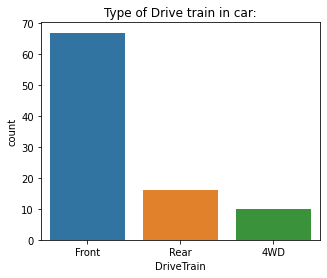

In [327]:
plt.figure(figsize=(5, 4))
plt.title("Type of Drive train in car:")
sb.countplot(A.DriveTrain)

most of the vehicles are front drive and very few having 4 wheel drive. 

<AxesSubplot:title={'center':'Number of cylinder in cars:'}, xlabel='Cylinders', ylabel='count'>

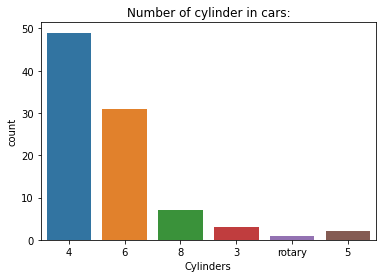

In [328]:
plt.figure(figsize=(6, 4))
plt.title("Number of cylinder in cars:")
sb.countplot(A.Cylinders)

Majority of vehicles have 4 cylinders.Very marginal cars have rotary cylinders.

<AxesSubplot:title={'center':'Origin of car:'}, xlabel='Origin', ylabel='count'>

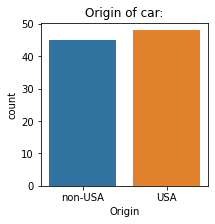

In [329]:
plt.figure(figsize=(3, 3))
plt.title("Origin of car:")
sb.countplot(A.Origin)

<AxesSubplot:title={'center':'Transmission type of cars:'}, xlabel='Mantransavail', ylabel='count'>

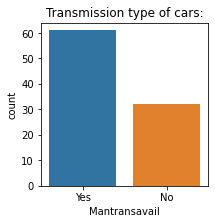

In [330]:
plt.figure(figsize=(3, 3))
plt.title("Transmission type of cars:")
sb.countplot(A.Mantransavail)

In [182]:
A.AirBags.unique()

array(['None', 'Driver & Passenger', 'Driver only'], dtype=object)

<AxesSubplot:title={'center':'Avialability of airbags in cars:'}, xlabel='AirBags', ylabel='count'>

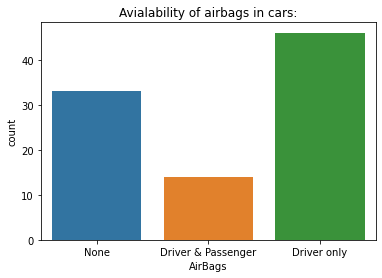

In [331]:
plt.figure(figsize=(6,4))
plt.title("Avialability of airbags in cars:")
sb.countplot(A.AirBags)

There are very fewcars with both driver and passenger airbags.

# Univariate Analysis 
## Continuous Columns

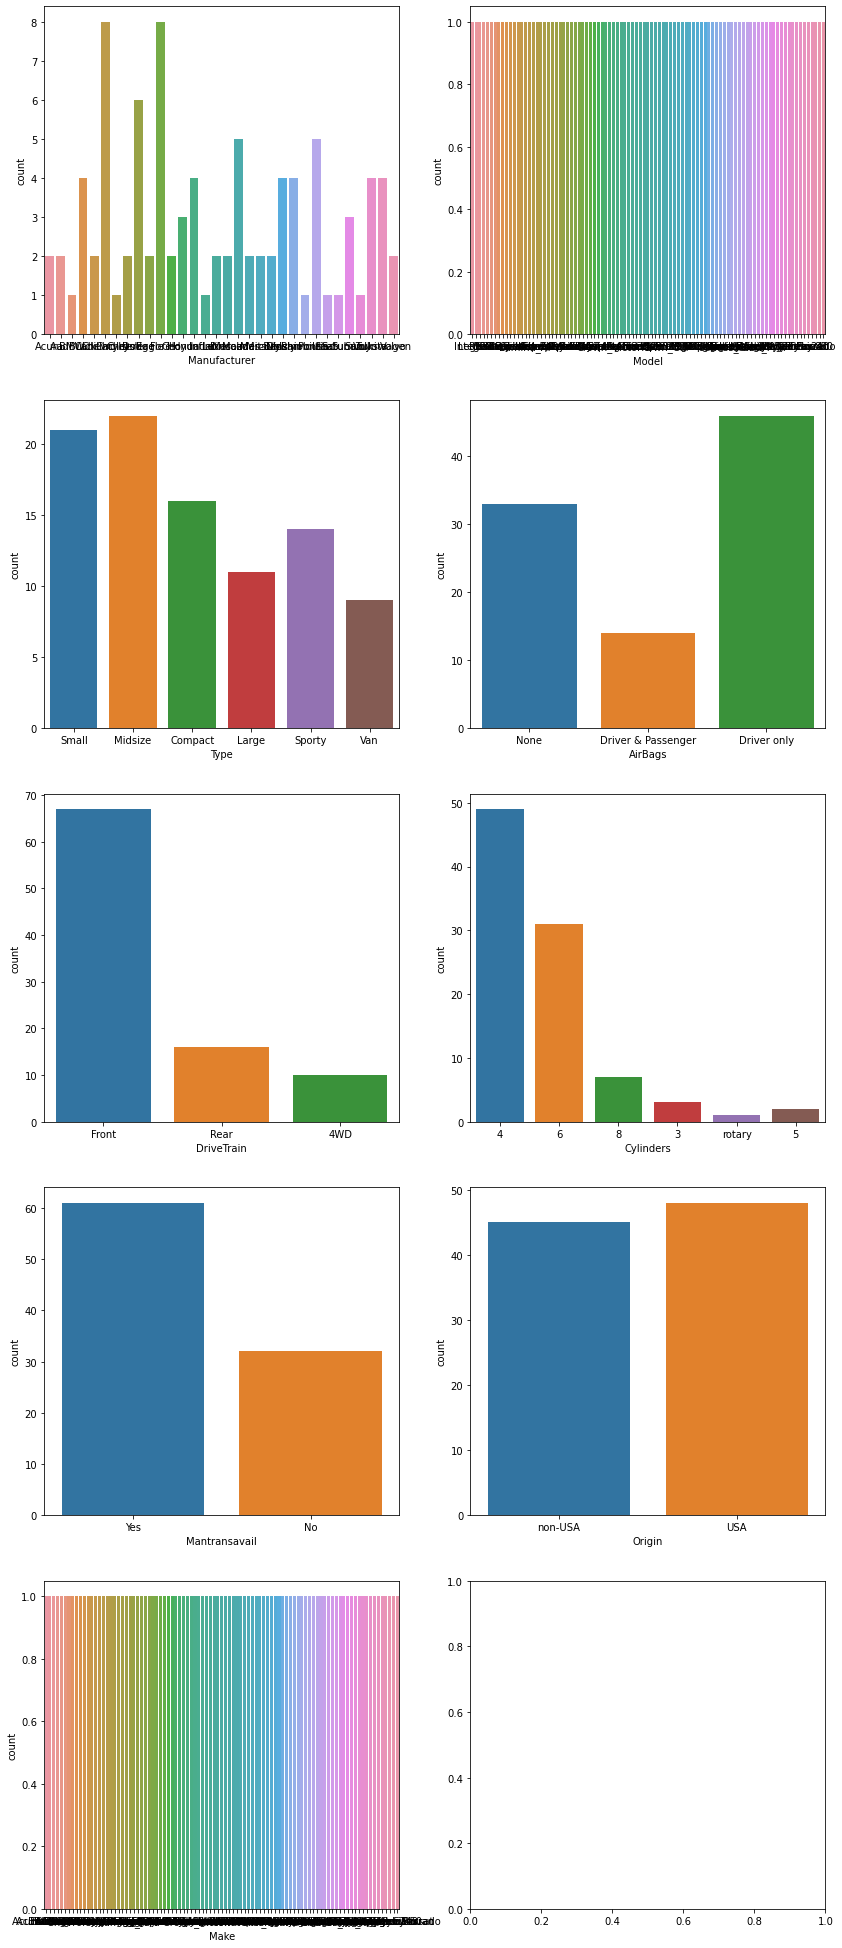

In [431]:
num_plots = len(cat)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows))
for i, var in enumerate(cat):
    row = i//2
    pos = i % 2
    plot = sb.countplot(x=var, data=A, ax=axs[row][pos])

<AxesSubplot:xlabel='Price', ylabel='Density'>

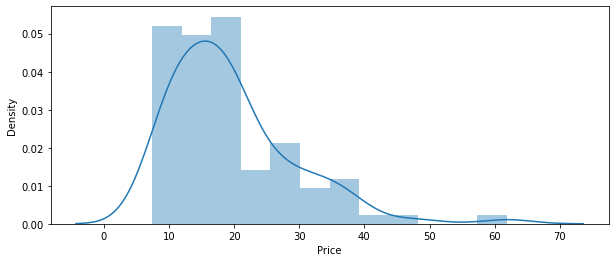

In [322]:
plt.figure(figsize=(10,4))
sb.distplot(A.Price)

<AxesSubplot:xlabel='Weight', ylabel='Density'>

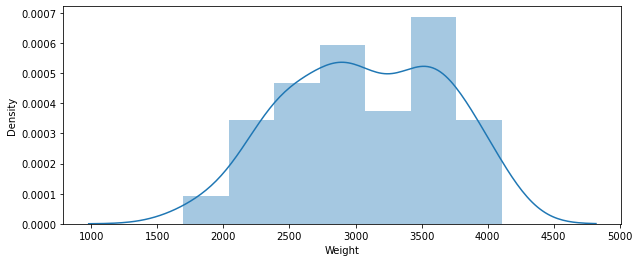

In [389]:
plt.figure(figsize=(10,4))
sb.distplot(A.Weight)

<AxesSubplot:xlabel='Width', ylabel='Density'>

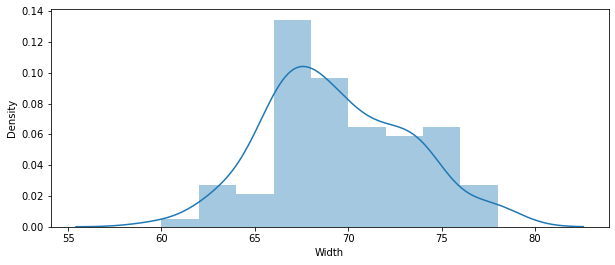

In [390]:
plt.figure(figsize=(10,4))
sb.distplot(A.Width)

<AxesSubplot:xlabel='EngineSize', ylabel='Density'>

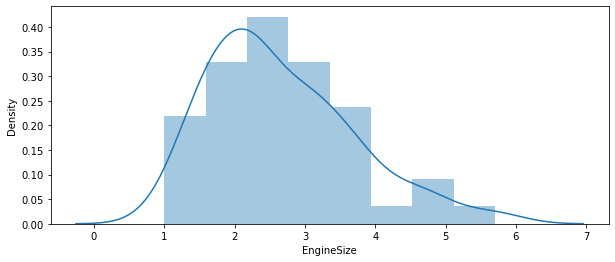

In [391]:
plt.figure(figsize=(10,4))
sb.distplot(A.EngineSize)

<AxesSubplot:xlabel='Horsepower', ylabel='Density'>

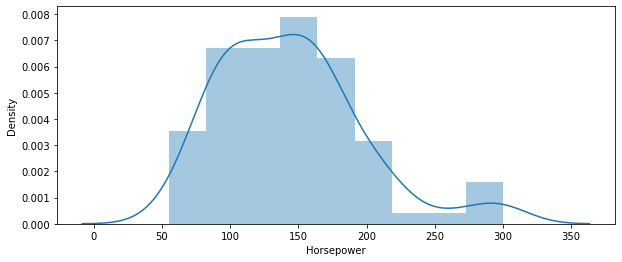

In [392]:
plt.figure(figsize=(10,4))
sb.distplot(A.Horsepower)

<AxesSubplot:xlabel='Fueltankcapacity', ylabel='Density'>

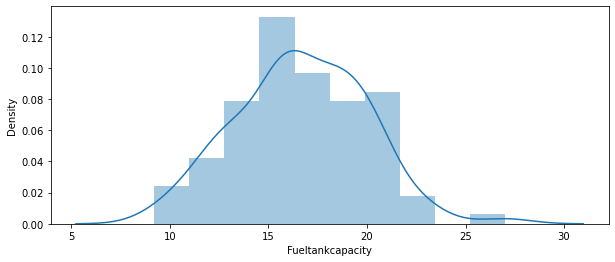

In [393]:
plt.figure(figsize=(10,4))
sb.distplot(A.Fueltankcapacity)

<AxesSubplot:xlabel='Length', ylabel='Density'>

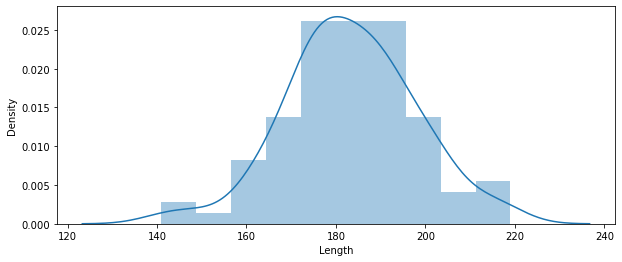

In [394]:
plt.figure(figsize=(10,4))
sb.distplot(A.Length)

<AxesSubplot:xlabel='Width', ylabel='Density'>

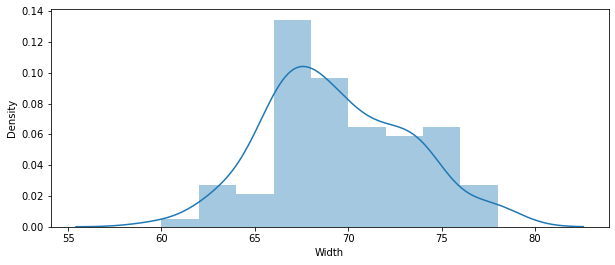

In [395]:
plt.figure(figsize=(10,4))
sb.distplot(A.Width)

In [ ]:
plt.figure(figsize=(10,4))
sb.distplot(A.Width)

There is skewness in teh data which has to be taken care and few outlires are also seen. Log transformation can be used to eliminate skewness of the data.

# Having a look at the correlation between the features.
## Heatmap

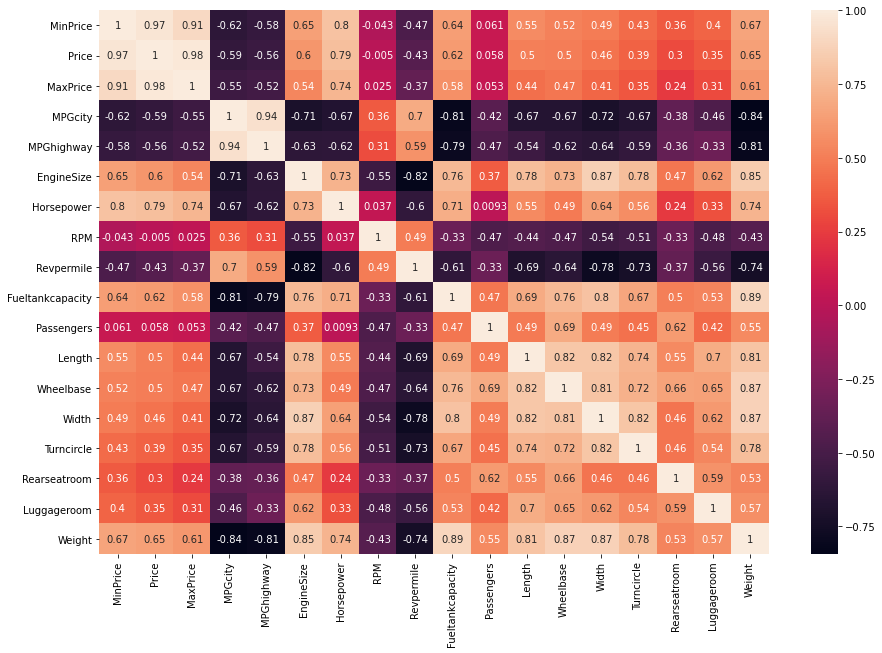

In [351]:
fig, ax = plt.subplots(figsize=(15,10))
ax=sb.heatmap(A.corr(),annot= True)

From the above heatmap few things are noted:

    1. Weight of the car has strong correlation with engine size, length, wheelbase, width and turncircle.
    
    2. Luggageroom has good correlation with length, width, wheelbase, rearseat room and weight.
    
    3. Length of car is dependent on engine size, fule tank capacity, wheelbase, width and turncircle, Luggageroom and 
       weight.
       
    4. To find the horse power the factors to look for are price, min price , max price, engine size, weight and fuel tank 
       capacity.
       
    5. Price of the car is correlated with the min price, max price and engine size.

In [185]:
A.corr()

,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,EngineSize,Horsepower,RPM,Revpermile,Fueltankcapacity,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight
MinPrice,1.000000,0.970601,0.906756,-0.622875,-0.579966,0.645488,0.802444,-0.042598,-0.470395,0.635369,0.061236,0.553859,0.516758,0.492878,0.428603,0.361525,0.395783,0.666554
Price,0.970601,1.000000,0.981580,-0.594562,-0.560680,0.597425,0.788218,-0.004955,-0.426395,0.619480,0.057860,0.503628,0.500864,0.456028,0.392590,0.301888,0.354635,0.647179
MaxPrice,0.906756,0.981580,1.000000,-0.547811,-0.522561,0.535012,0.744445,0.025015,-0.374024,0.581294,0.053216,0.442933,0.467501,0.408414,0.347785,0.241600,0.307020,0.605142
MPGcity,-0.622875,-0.594562,-0.547811,1.000000,0.943936,-0.710003,-0.672636,0.363045,0.695857,-0.813144,-0.416856,-0.666239,-0.667108,-0.720534,-0.666389,-0.380435,-0.462204,-0.843139
MPGhighway,-0.579966,-0.560680,-0.522561,0.943936,1.000000,-0.626795,-0.619044,0.313469,0.587497,-0.786039,-0.466386,-0.542897,-0.615384,-0.640359,-0.593683,-0.364284,-0.327732,-0.810658
EngineSize,0.645488,0.597425,0.535012,-0.710003,-0.626795,1.000000,0.732120,-0.547898,-0.824009,0.759306,0.372721,0.780283,0.732484,0.867110,0.778464,0.473740,0.618326,0.845075
Horsepower,0.802444,0.788218,0.744445,-0.672636,-0.619044,0.732120,1.000000,0.036688,-0.600314,0.711790,0.009264,0.550865,0.486854,0.644413,0.561216,0.236871,0.328568,0.738798
RPM,-0.042598,-0.004955,0.025015,0.363045,0.313469,-0.547898,0.036688,1.000000,0.494764,-0.333345,-0.467138,-0.441249,-0.467812,-0.539721,-0.505651,-0.333847,-0.481744,-0.427931
Revpermile,-0.470395,-0.426395,-0.374024,0.695857,0.587497,-0.824009,-0.600314,0.494764,1.000000,-0.609710,-0.334976,-0.690233,-0.636824,-0.780460,-0.733160,-0.370410,-0.557095,-0.735264
Fueltankcapacity,0.635369,0.619480,0.581294,-0.813144,-0.786039,0.759306,0.711790,-0.333345,-0.609710,1.000000,0.472095,0.690461,0.757674,0.798719,0.671343,0.503797,0.528362,0.894018


In [375]:
A.columns

Index(['Manufacturer', 'Model', 'Type', 'MinPrice', 'Price', 'MaxPrice',
       'MPGcity', 'MPGhighway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Revpermile', 'Mantransavail',
       'Fueltankcapacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turncircle', 'Rearseatroom', 'Luggageroom', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [370]:
s = A.select_dtypes(exclude=['object'])

<Figure size 14400x1440 with 0 Axes>

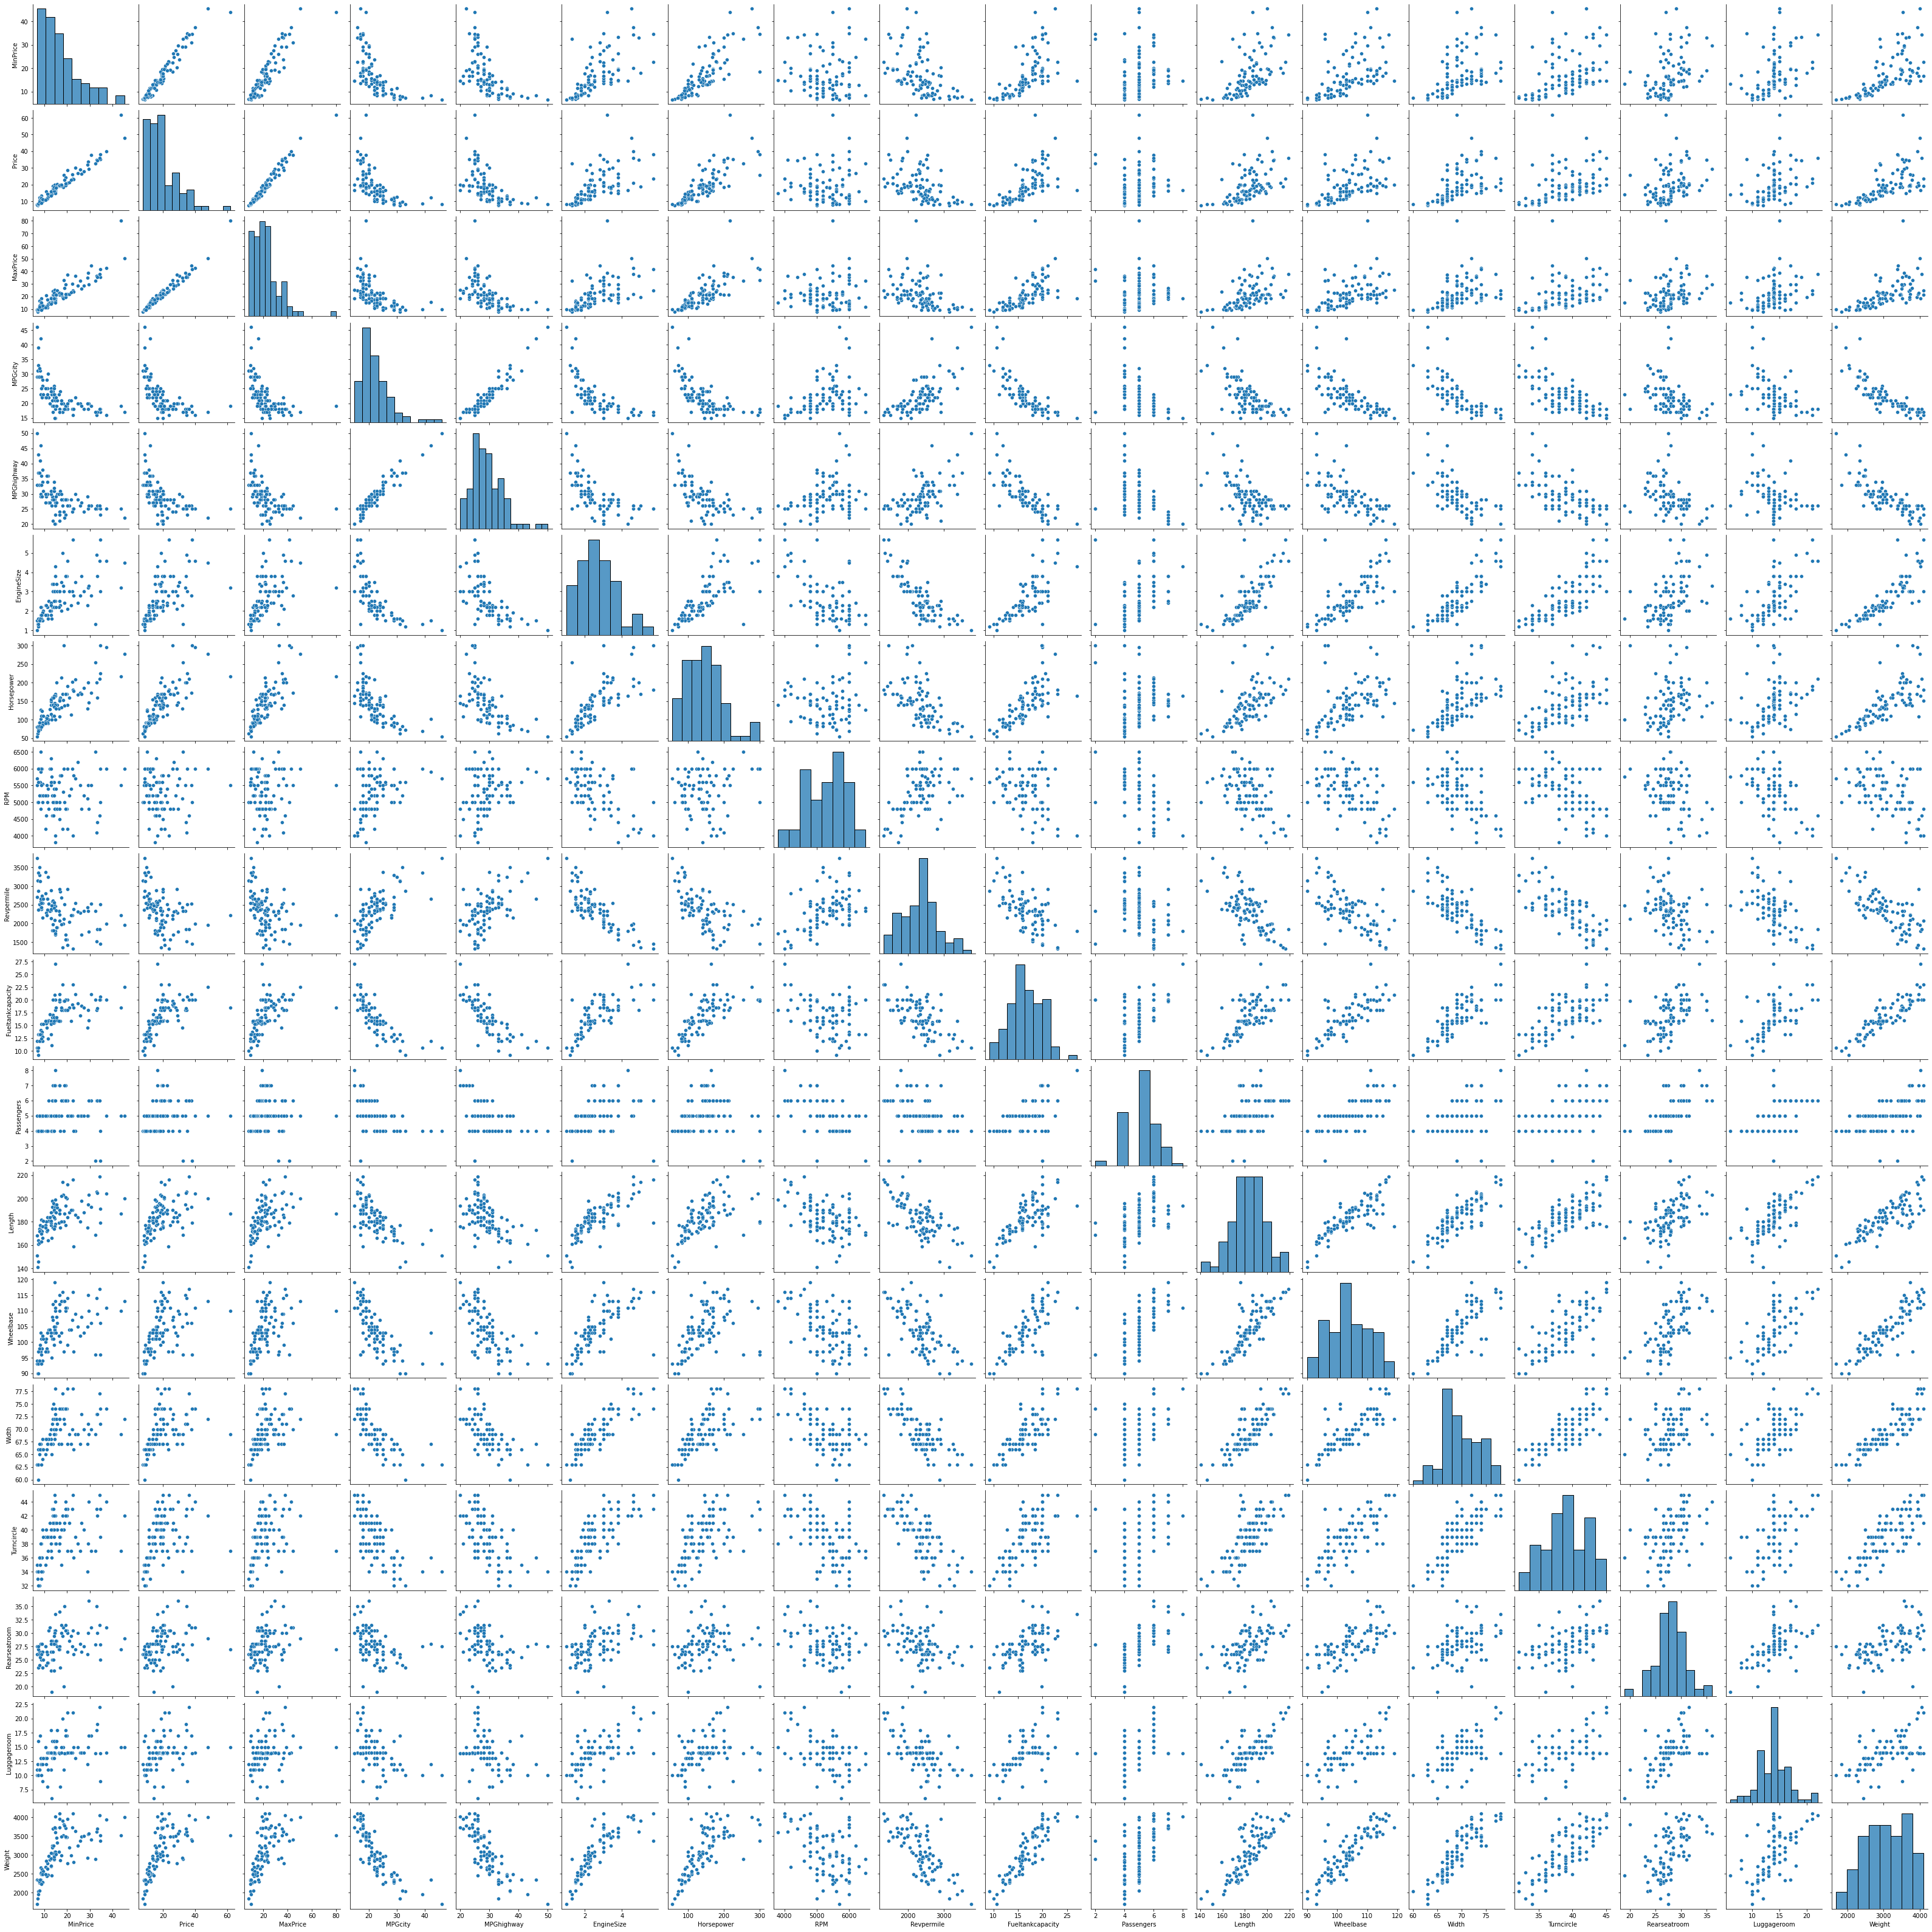

In [373]:
plt.figure(figsize=(200,20))
sb.pairplot(s)

In [387]:
r=A.drop(labels=['Manufacturer', 'Model', 'Type', 'MinPrice', 'MaxPrice','Passengers','MPGcity', 'MPGhighway', 'DriveTrain', 'Cylinders','RPM', 'Revpermile', 'Mantransavail','Turncircle', 'Origin',
       'Make'],axis=1)

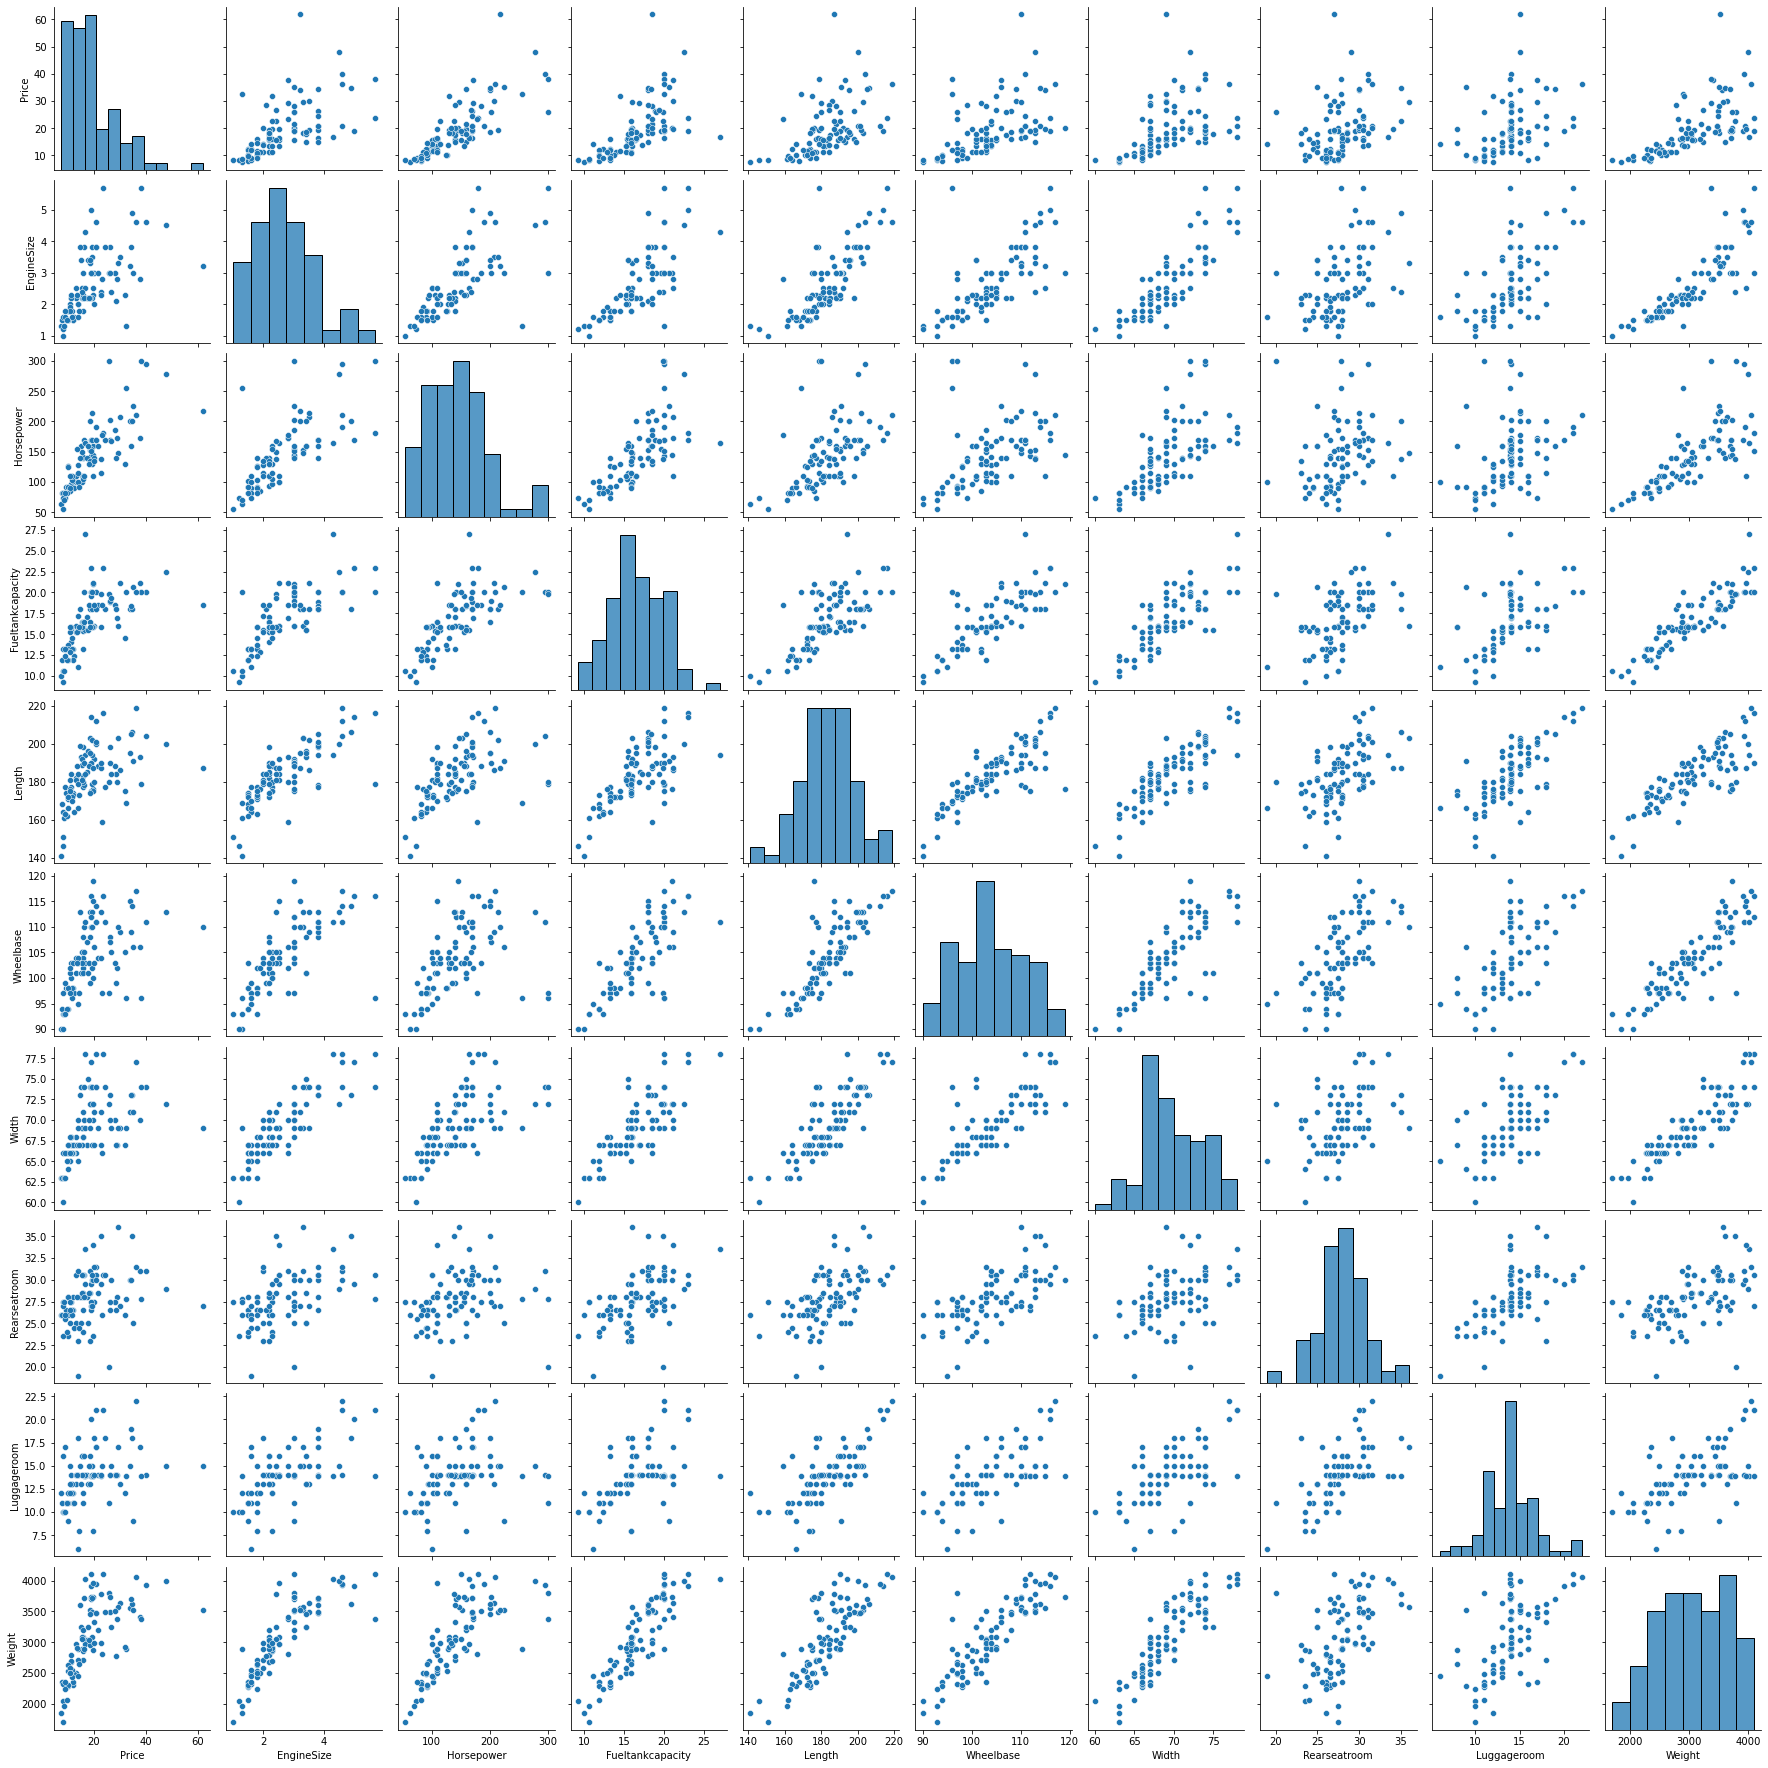

In [388]:
sb.pairplot(r)
# plotting the columns which were identified as correlated columns.

Looking at the abve plot, the observations made in the heatmap is again analyzed to find its trueness about the relation between the columns. It is seen here that many columns are showing good relationship. This will be furthur analysed in the next section i.e. bivariate analysis.

# Bivariate Analysis

<AxesSubplot:xlabel='AirBags', ylabel='Weight'>

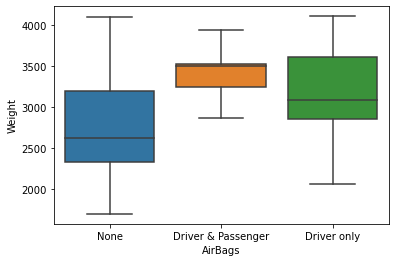

In [427]:
sb.boxplot(x='AirBags', y='Weight', data=A)

<AxesSubplot:xlabel='AirBags', ylabel='Price'>

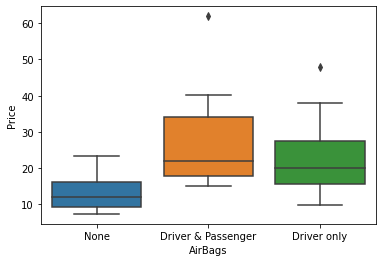

In [428]:
sb.boxplot(x='AirBags', y='Price',data=A)

<AxesSubplot:xlabel='AirBags', ylabel='Horsepower'>

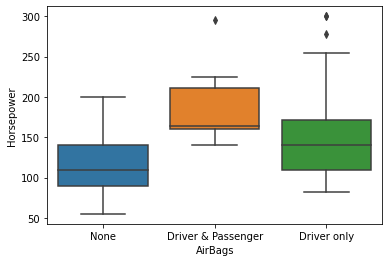

In [448]:
sb.boxplot(x='AirBags', y='Horsepower',data=A)

<AxesSubplot:xlabel='AirBags', ylabel='Fueltankcapacity'>

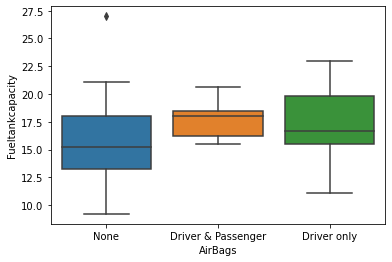

In [449]:
sb.boxplot(x='AirBags', y='Fueltankcapacity',data=A)

<AxesSubplot:xlabel='AirBags', ylabel='Length'>

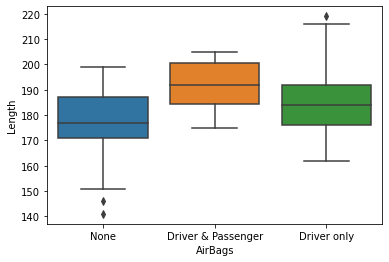

In [450]:
sb.boxplot(x='AirBags', y='Length',data=A)

<AxesSubplot:xlabel='AirBags', ylabel='Width'>

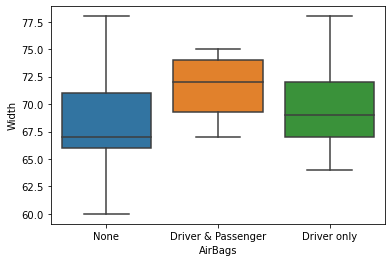

In [451]:
sb.boxplot(x='AirBags', y='Width',data=A)

<AxesSubplot:xlabel='AirBags', ylabel='Luggageroom'>

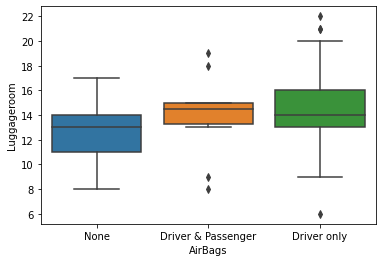

In [452]:
sb.boxplot(x='AirBags', y='Luggageroom',data=A)

In [453]:
    sb.scatterplot()

TypeError: object of type 'int' has no len()

In [446]:
cat

['Manufacturer',
 'Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Mantransavail',
 'Origin',
 'Make']

In [447]:
con

['MinPrice',
 'Price',
 'MaxPrice',
 'MPGcity',
 'MPGhighway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Revpermile',
 'Fueltankcapacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turncircle',
 'Rearseatroom',
 'Luggageroom',
 'Weight']